# Final Project: Diabetes Prediction Using Machine Learning

## Data Prep 
### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score)

### Load the dataset

In [2]:
df = pd.read_csv("diabetes.csv")

## Data Cleaning

### Replace zeros with NaN for specific medical features

In [3]:
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

### Impute missing values with median

In [4]:
imputer = SimpleImputer(strategy='median')
df[cols_with_zero_invalid] = imputer.fit_transform(df[cols_with_zero_invalid])

### Feature selection

In [5]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


### Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### PCA for 2D Visualization (not used in training)

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

### Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Initialize Models

In [9]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, penalty='l2')
}

## Train and Evaluate Models

In [10]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    report = classification_report(y_test, y_pred, output_dict=True)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"

    results.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1 Score": report["1"]["f1-score"],
        "ROC AUC": auc
    })

## Display results as DataFrame

In [11]:
results_df = pd.DataFrame(results)
print("Model Evaluation Summary:\n", results_df)

Model Evaluation Summary:
                  Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0        Random Forest  0.740260   0.631579  0.654545  0.642857  0.833425
1                  KNN  0.733766   0.612903  0.690909  0.649573  0.767769
2                  SVM  0.746753   0.666667  0.581818  0.621359  0.807163
3  Logistic Regression  0.753247   0.666667  0.618182  0.641509  0.822957


##  ROC Curve for Random Forest

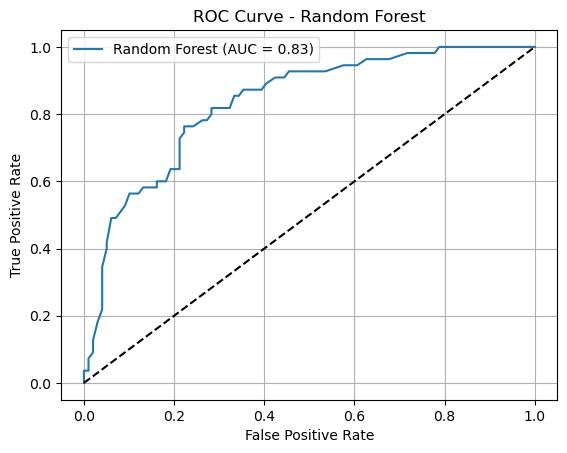

In [12]:
rf_model = models["Random Forest"]
y_rf_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_rf_proba)

plt.figure()
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_rf_proba):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid(True)
plt.show()

## Feature Importance from Random Forest

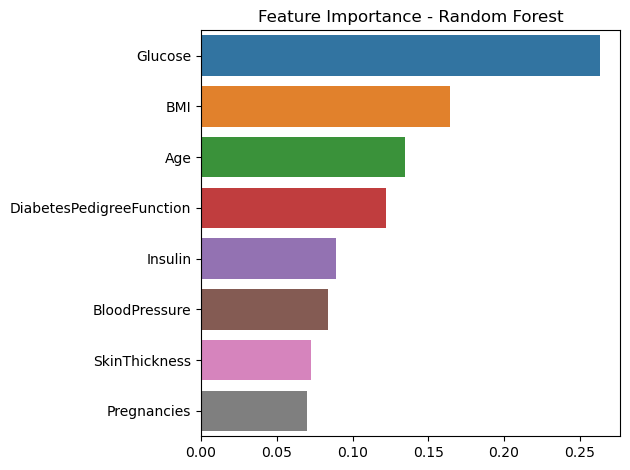

In [25]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure()
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

## Correlation Heatmap

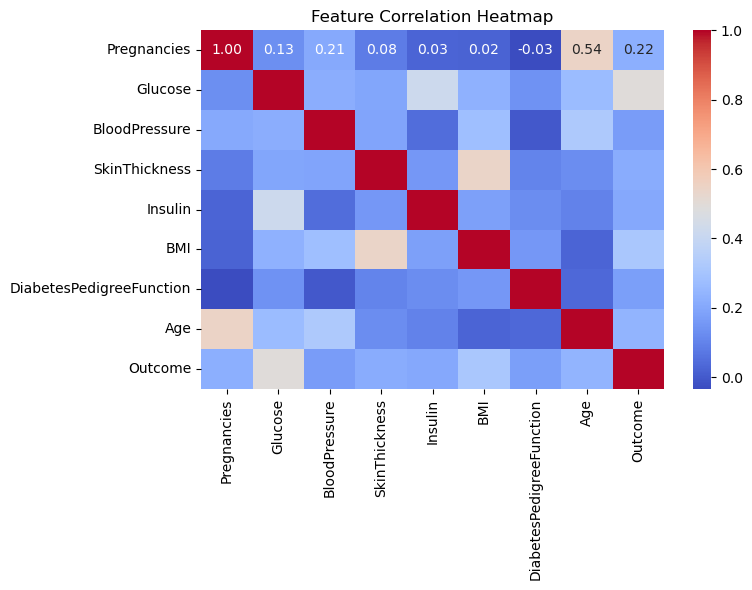

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## Distribution Plots by Outcome

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


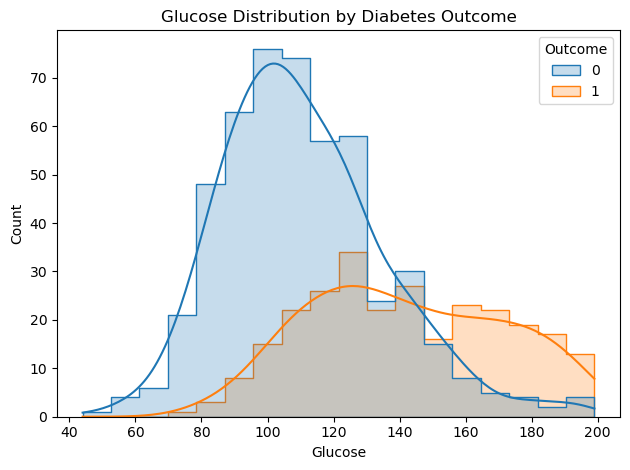

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


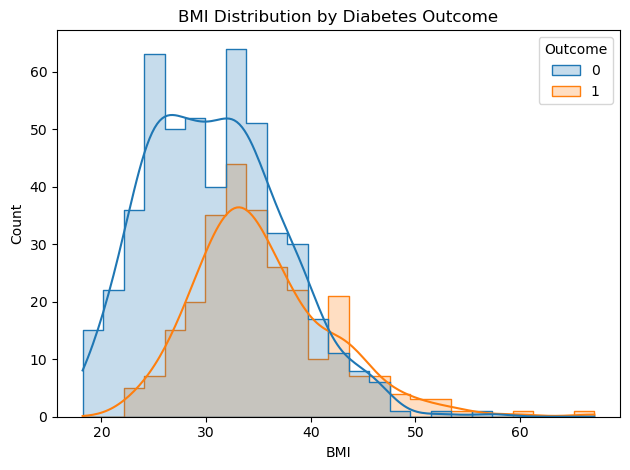

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


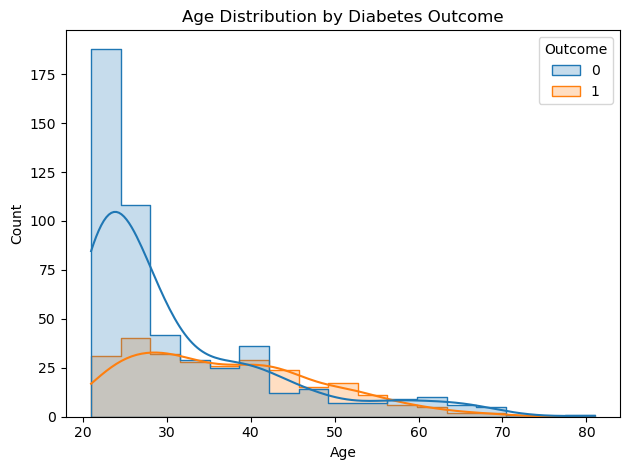

In [28]:
for col in ['Glucose', 'BMI', 'Age']:
    plt.figure()
    sns.histplot(data=df, x=col, hue="Outcome", kde=True, element="step")
    plt.title(f"{col} Distribution by Diabetes Outcome")
    plt.tight_layout()
    plt.show()`

##  PCA 2D Scatter Plot

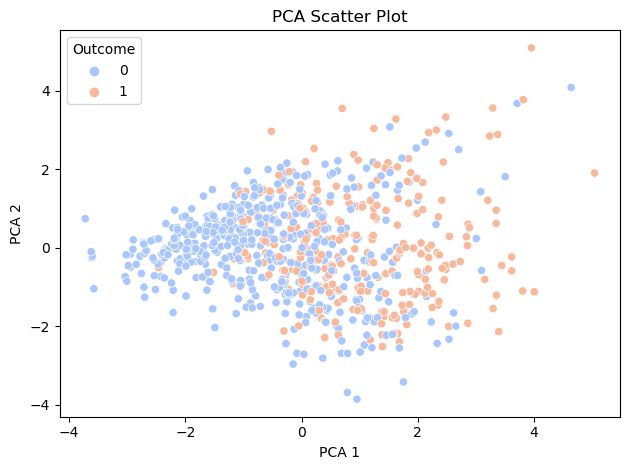

In [30]:
plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatter Plot")
plt.tight_layout()
plt.show()

## Confusion Matrix for Random Forest

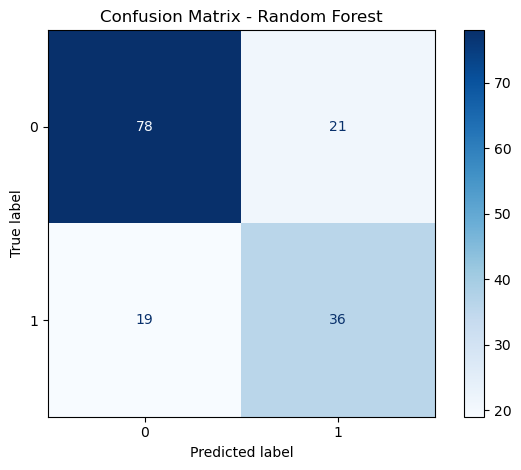

In [26]:
rf_preds = rf_model.predict(X_test)
cm = confusion_matrix(y_test, rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.tight_layout()
plt.show()